In [ ]:
from warp import *
#sa = cv2.imread("/home/shupeizhang/Downloads/test/0012.png", cv2.IMREAD_GRAYSCALE)
#oi = cv2.imread("/home/shupeizhang/Downloads/test/image_0012.png")
sa = cv2.imread("../../Datasets/saliency/UCF/training/Diving-Side-005/maps/Diving-Side_005_001.png", cv2.IMREAD_GRAYSCALE)
oi = cv2.imread("../../Datasets/saliency/UCF/training/Diving-Side-005/images/Diving-Side_005_001.png")
oi = oi[:,:,::-1]
sa = cv2.resize(sa, (oi.shape[1], oi.shape[0]))
g = Gaussian((404,720))
g.parameterize(sa, 10)
c = g.extract_centers()
s = salient_scale(c, (404,720), (0.6, 0.6))
w = lambda x, y: rescale(x, 0.6, 0.6)
m = Mesh(sa, 10, (288, 432), 8, w)
m.V = m.warped_vertices
m.plot_mesh()
m.generate_mapping(5, c, s)
ot = m.coor_warping(oi)
ot.shape

In [14]:
m.coor_mapping[234:237,234:237]

array([[[369.73030922, 379.79749787],
        [369.87603029, 381.26722247],
        [370.02073099, 382.72665558]],

       [[371.92914934, 380.02491096],
        [372.06734599, 381.49597741],
        [372.20457354, 382.956728  ]],

       [[374.13443083, 380.25299024],
        [374.26505839, 381.7254001 ],
        [375.1628866 , 383.13090562]]])

In [8]:
import matplotlib.pyplot as plt
from PIL import Image

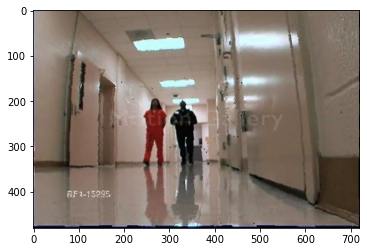

In [9]:
rp = m.reverse_warping(ot)
plt.imshow(rp)
a=Image.fromarray(rp)
a.save("rp.png")

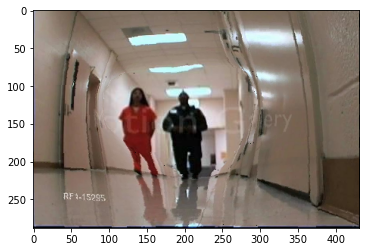

In [4]:
plt.imshow(ot)

In [1]:
import cv2
oi = cv2.imread("../../Datasets/saliency/UCF/training/Diving-Side-005/images/Diving-Side_005_001.png")

In [63]:
import numpy as np
#lpips
results = []
with open('lpips.txt', 'r') as file:
    line = file.readline()
    line = file.readline()
    while line != '':
        c = line.split('\t')
        results.append((c[0], int(c[1]), float(c[2]), float(c[3])))
        line = file.readline()
# proposed, h264
scores = np.zeros((3, len(results)//7, 2))
for idx, i in enumerate(results):
    if idx%7 not in [4, 5, 6]:
        continue
    scores[idx%7 - 4, idx//7, 0] = i[2]
    scores[idx%7 - 4, idx//7, 1] = i[3]

print("LPIPS overall:\n{}\n".format(scores.mean(1)))
    
# scores of each category 
results2 = []
tmp = []
last = 'Diving-Side'
cats = [last]
for idx, i in enumerate(results):
    if idx%7 != 0:
        continue
    if i[0][:-4] == last:
        tmp.append(idx//7)
    else:
        results2.append(tmp)
        tmp = []
        tmp.append(idx//7)
        last = i[0][:-4]
        cats.append(last)
print("LPIPS category:\n")  
for j, i in enumerate(results2):
    print(cats[j])
    print(scores[:,i,:].mean(axis=(1)))

LPIPS overall:
[[0.19293491 0.14097836]
 [0.27531275 0.29966441]
 [0.40161028 0.44762756]]

LPIPS category:

Diving-Side
[[0.2186555  0.2571355 ]
 [0.31334396 0.51872064]
 [0.44420931 0.56084918]]
Golf-Swing-Front
[[0.21306202 0.12439242]
 [0.28768165 0.1992016 ]
 [0.40357619 0.34716164]]
Golf-Swing-Side
[[0.2075586  0.13050285]
 [0.29307679 0.22186737]
 [0.40190619 0.38605676]]
Kicking-Front
[[0.21131649 0.15325915]
 [0.31905988 0.32269134]
 [0.43655317 0.55122238]]
Kicking-Side
[[0.17531566 0.13944106]
 [0.24553237 0.25981129]
 [0.34816319 0.44791022]]
Lifting
[[0.11964878 0.06639781]
 [0.17659662 0.28487044]
 [0.31582823 0.40282228]]
Riding-Horse
[[0.18826034 0.18590882]
 [0.28161285 0.33762645]
 [0.40102181 0.47339407]]
Run-Side
[[0.19545632 0.2024066 ]
 [0.2779047  0.35966897]
 [0.38971436 0.46057324]]
SkateBoarding-Front
[[0.21692145 0.13530926]
 [0.30888053 0.26777828]
 [0.42623346 0.42564275]]
Swing-Bench
[[0.17809066 0.0936628 ]
 [0.24984772 0.32578535]
 [0.40064961 0.49909661

In [62]:
#vmaf
results = []
with open('vmaf.txt', 'r') as file:
    line = file.readline()
    line = file.readline()
    while line != '':
        c = line.split('\t')
        results.append((c[0], int(c[1]), float(c[2]), float(c[3])))
        line = file.readline()
# proposed, h264
scores = np.zeros((3, len(results)//7, 2))
for idx, i in enumerate(results):
    if idx%7 not in [4, 5, 6]:
        continue
    scores[idx%7 - 4, idx//7, 0] = i[2]
    scores[idx%7 - 4, idx//7, 1] = i[3]

print("VMAF overall:\n{}\n".format(scores.mean(1)))
    
# scores of each category 
results2 = []
tmp = []
last = 'Diving-Side'
cats = [last]
for idx, i in enumerate(results):
    if idx%7 != 0:
        continue
    if i[0][:-4] == last:
        tmp.append(idx//7)
    else:
        results2.append(tmp)
        tmp = []
        tmp.append(idx//7)
        last = i[0][:-4]
        cats.append(last)
print("VMAF category:\n")  
for j, i in enumerate(results2):
    print(cats[j])
    print(scores[:,i,:].mean(axis=(1)))

VMAF overall:
[[41.67589191 64.81683572]
 [29.31347167 32.01627922]
 [13.39818052 11.40588722]]

VMAF category:

Diving-Side
[[48.2219008 51.666166 ]
 [33.2721266  8.4884961]
 [15.4114017  7.6024116]]
Golf-Swing-Front
[[45.712674   75.04914843]
 [35.58104914 61.069627  ]
 [19.89108129 34.04697014]]
Golf-Swing-Side
[[39.3309726 70.614016 ]
 [28.8004958 48.554944 ]
 [15.1625274 16.560636 ]]
Kicking-Front
[[43.341902   66.34148025]
 [30.1341165  32.31989875]
 [16.513983    6.424976  ]]
Kicking-Side
[[42.2008744 65.2795487]
 [29.041259  30.342802 ]
 [12.6444842  4.9896457]]
Lifting
[[39.04686875 70.32955425]
 [26.96362475 14.81064775]
 [ 6.16931025  1.7310655 ]]
Riding-Horse
[[44.51401887 53.577718  ]
 [28.57220613 27.4205965 ]
 [14.05175312  8.44958375]]
Run-Side
[[46.06139156 52.71550511]
 [29.56054478 20.41471422]
 [13.37531711  8.72777822]]
SkateBoarding-Front
[[37.36440513 64.69950013]
 [27.0760675  37.15978288]
 [12.7987975  11.988814  ]]
Swing-Bench
[[35.83814129 67.16810786]
 [26.0

In [121]:
from scipy.stats import binomtest
# subjective
results = []
with open('response.txt', 'r') as file:
    line = file.readline()
    while line != '':
        try:
            c = line.split('\t')
            int(c[2])
            results.append((c[1], int(c[2]), int(c[3])))
        except:
            pass
        line = file.readline()
scores = np.zeros((3, len(results)//3, 2))
# proposed, h264
for idx, i in enumerate(results):
    scores[idx%3, idx//3, 0] = i[2] == 1
    scores[idx%3, idx//3, 1] = i[2] == 0
print(np.sum(scores[0,:,0] == 1), np.sum(scores[0,:,0] == 0))

72 88


In [122]:
a = binomtest(72, 160, 0.5, "less")
print(a)
a.proportion_ci(0.99)

BinomTestResult(k=72, n=160, alternative='less', proportion_estimate=0.45, pvalue=0.11779121323463446)


ConfidenceInterval(low=0.0, high=0.5449121746605708)

0.2355824264692689
1.795956230322765e-11
1.1003523795356136e-16


array([0.45   , 0.7625 , 0.81875])

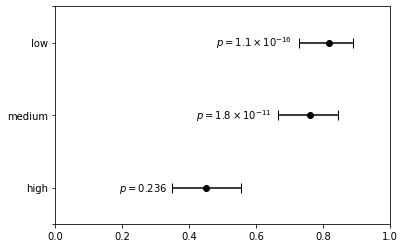

In [125]:
import matplotlib.pyplot as plt
errs = np.zeros((2, 3))
x = np.zeros(3)
for i in range(3):
    count = (np.sum(scores[i,:,0] == 1), np.sum(scores[i,:,0] == 0))
    mode = 'greater' if count[0] >= count[1] else 'less'
    t = binomtest(count[0], count[0] + count[1], 0.5)
    errs[0, i] = t.proportion_estimate - t.proportion_ci(0.99).low
    errs[1, i] = t.proportion_ci(0.99).high - t.proportion_estimate
    x[i] = t.proportion_estimate
    print(t.pvalue)
y = [1, 3, 5]
plt.figure()
plt.errorbar(x, y, xerr=errs, fmt = 'o', color = 'k', capsize=5)
plt.yticks((0, 1, 3, 5, 6), ('', 'high', 'medium', 'low','')) 
plt.xlim([0, 1])
plt.text(0.48, 4.9, r"$p = 1.1 \times 10^{-16}$")
plt.text(0.42, 2.9, r"$p = 1.8 \times 10^{-11}$")
plt.text(0.19, 0.9, r"$p=0.236$")
x

In [118]:
#EWPSNR
results = []
with open('264.txt', 'r') as file:
    line = file.readline()
    while line != '':
        c = line.split('\t')
        results.append((c[0], int(c[1]), float(c[2]), float(c[3])))
        line = file.readline()
# proposed, h264
scores = np.zeros((3, len(results)//7, 2))
bitrate = np.zeros((3, len(results)//7, 2))
for idx, i in enumerate(results):
    if idx%7 not in [4, 5, 6]:
        continue
    scores[idx%7 - 4, idx//7, 1] = i[3]
    bitrate[idx%7 - 4, idx//7, 1] = i[2]
results = []
with open('proposed.txt', 'r') as file:
    line = file.readline()
    while line != '':
        c = line.split('\t')
        results.append((c[0], int(c[1]), float(c[2]), float(c[3])))
        line = file.readline()
for idx, i in enumerate(results):
    if idx%7 not in [4, 5, 6]:
        continue
    scores[idx%7 - 4, idx//7, 0] = i[3]
    bitrate[idx%7 - 4, idx//7, 0] = i[2]

print("EWPSNR overall:\n{}\n".format(scores.mean(1)))
print("EWPSNR bitrate overall:\n{}\n".format(bitrate.mean(1)))

# scores of each category 
results2 = []
tmp = []
last = 'Diving-Side'
cats = [last]
for idx, i in enumerate(results):
    if idx%7 != 0:
        continue
    if i[0][:-4] == last:
        tmp.append(idx//7)
    else:
        results2.append(tmp)
        tmp = []
        tmp.append(idx//7)
        last = i[0][:-4]
        cats.append(last)
print("EWPSNR category:\n")  
for j, i in enumerate(results2):
    print(cats[j])
    print(scores[:,i,:].mean(axis=(1)))

EWPSNR overall:
[[26.35798589 26.93615672]
 [25.58597373 25.42727753]
 [24.83375857 24.4330339 ]]

EWPSNR bitrate overall:
[[0.02326995 0.02558593]
 [0.01098488 0.01091876]
 [0.00581079 0.0061542 ]]

EWPSNR category:

Diving-Side
[[25.88835911 25.55470427]
 [25.14094753 24.11281617]
 [24.46404845 23.90039984]]
Golf-Swing-Front
[[28.87868479 30.35563804]
 [27.8720826  29.11232978]
 [26.71140175 26.99428184]]
Golf-Swing-Side
[[26.3820764  27.36345644]
 [25.68947015 26.10618899]
 [25.03277026 24.84427862]]
Kicking-Front
[[27.45479475 28.2777796 ]
 [26.56214754 26.25810944]
 [25.59248988 24.44499919]]
Kicking-Side
[[27.24675676 27.93493561]
 [26.3241917  25.83810181]
 [25.37022204 24.36848071]]
Lifting
[[25.54871008 26.34780361]
 [25.02668645 24.58324604]
 [24.46283998 24.06810815]]
Riding-Horse
[[26.1147491  26.3274676 ]
 [25.31258483 24.98631573]
 [24.580896   24.09674501]]
Run-Side
[[26.96330013 27.03942521]
 [25.98061242 25.24121982]
 [25.0209497  24.28457359]]
SkateBoarding-Front
[[25